In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [2]:
# Read CSV 
df = pd.read_csv('D3.csv')
# Initialize inputs outputs and the number of data points 
x_1 = df.values[:,0]
x_2 = df.values[:,1]
x_3 = df.values[:,2]
Y = df.values[:,3]
m = len(Y)
x_0 = np.ones((m,1))
# put in list for automation 
x_i_old = [x_1,x_2,x_3]
x_i = [x_1,x_2,x_3]
# Initialize Results 
final_thetas = np.zeros((3,2))
costhistorys = [[]] * 3 
# Initialize Value for terms to change
alpha = .01
iterations = 1500
theta = np.zeros(2)


In [3]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [4]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)   
  """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

In [5]:
# Preform the linear regression then store 
for i in range(len(costhistorys)):
    # Reshape for linear algebra 
    x_i[i] = x_i[i].reshape(m,1)
    # Add x_0 term to each X value 
    x_i[i] = np.hstack((x_0,x_i[i]))
    # preform the calculations
    final_thetas[i,:], costhistorys[i] = gradient_descent(x_i[i], Y, theta, alpha, iterations)
    

In [6]:
for i in range(final_thetas.shape[0]):
    print('Model for x_' + str(i) + ':',final_thetas[i,:])

Model for x_0: [ 5.71850653 -1.9568206 ]
Model for x_1: [0.71988473 0.56390334]
Model for x_2: [ 2.78048129 -0.48451631]


In [7]:
compute_cost(x_i[0], Y, final_thetas[0,:]) 

0.9905894438682062

In [8]:
# Plot Linear Regression and Cost Plot 
for i in range(len(x_i)):   
    plt.scatter(x_i_old[i], Y, color='red', marker= '+', label= 'Training Data') 
    plt.plot(x_i[i][:,1], x_i[i].dot(final_thetas[i,:]), color='green', label='Linear Regression') 

    plt.rcParams["figure.figsize"] = (10,6) 
    plt.grid() 
    plt.xlabel('x_' + str(i + 1) + ' Values') 
    plt.ylabel('Y Values') 
    plt.title('Linear Regression Fit') 
    plt.legend() 
    plt.savefig('output'+ str(i) + '.jpg')
    plt.clf()
    

    plt.plot(range(1, iterations + 1),costhistorys[i], color='blue') 
    plt.rcParams["figure.figsize"] = (10,6) 
    plt.grid() 
    plt.xlabel('Number of iterations') 
    plt.ylabel('Cost (J)') 
    plt.title('Convergence of gradient descent for x_' + str(i + 1))
    plt.savefig('convergence' + str(i) + '.jpg') 
    plt.clf()

<Figure size 432x288 with 0 Axes>

# Problem 2

In [9]:
df2 = pd.read_csv('D3.csv')

In [10]:
# Initialize Variables 
iterations2 = 1500
alpha2 = .01
# Add Column of ones to the begining of the data 
df2 =  pd.concat([pd.Series(1, index=df.index, name='x_0'), df], axis=1)
# Get the inputs bb
X = df2.drop(columns='Y')
# Get the outputs 
Y = df2.values[:,4]
# Declare theta 
theta = np.array([0]*len(X.columns))

In [22]:
X

,x_0,X1,X2,X3
0,1,0.000000,3.440000,0.440000
1,1,0.040404,0.134949,0.888485
2,1,0.080808,0.829899,1.336970
3,1,0.121212,1.524848,1.785455
4,1,0.161616,2.219798,2.233939
...,...,...,...,...
95,1,3.838384,1.460202,3.046061
96,1,3.878788,2.155152,3.494545
97,1,3.919192,2.850101,3.943030
98,1,3.959596,3.545051,0.391515


In [11]:
# Run the linear regression algorithm
model, cost_func = gradient_descent(X,Y,theta,alpha2,iterations2)
temp = 0
for i in model:
    print('Theta_' + str(temp) + ' =', i)
    temp += 1

Theta_0 = 4.151187282528127
Theta_1 = -1.839429097710375
Theta_2 = 0.7247385609338923
Theta_3 = -0.09513266408711538


In [12]:
plt.plot(range(1, iterations2 + 1),cost_func, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent for entire model')
plt.savefig('convergence_part2.jpg') 
plt.clf()

<Figure size 720x432 with 0 Axes>

In [13]:
# Create New dataframe for new data 
data = {'x1New' : [1,2,3], 'x2New' : [1,0,2], 'x3New' : [1,4,1]}
newDf = pd.DataFrame(data)
newDf =  pd.concat([pd.Series(1, index=newDf.index, name='x0New'), newDf], axis=1)
newDf = newDf.to_numpy() # Needs to be a numpy array to do the dot module
# dot new data with model to predict the output
Hypothosis = newDf.dot(model)
for i in range(len(Hypothosis)):
    print('Predicted Value ' + str(i+1) + ':', Hypothosis[i])

Predicted Value 1: 2.9413640816645295
Predicted Value 2: 0.09179843075891558
Predicted Value 3: -0.012755552822328736


# Display Graphs 

In [14]:
from PIL import Image

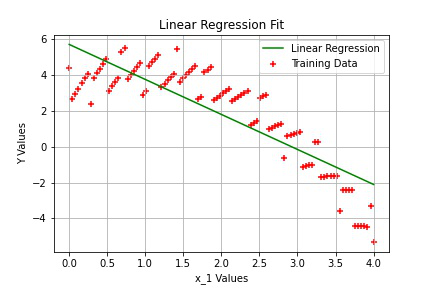

In [15]:
Image.open('output0.jpg')

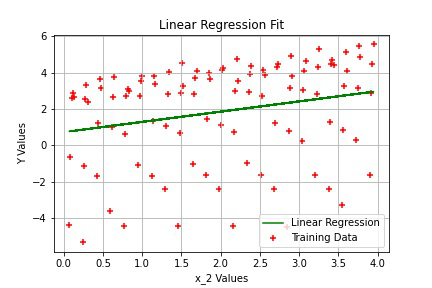

In [16]:
Image.open('output1.jpg')

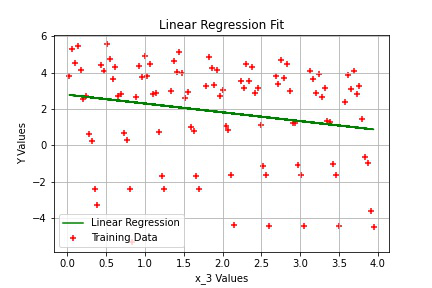

In [17]:
Image.open('output2.jpg')

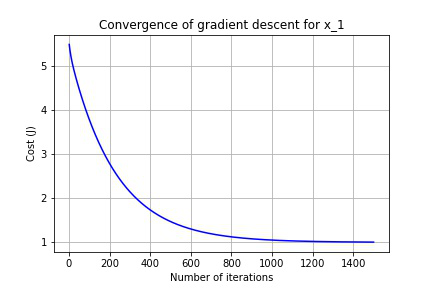

In [18]:
Image.open('convergence0.jpg')

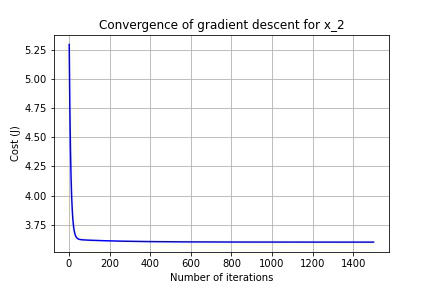

In [19]:
Image.open('convergence1.jpg')

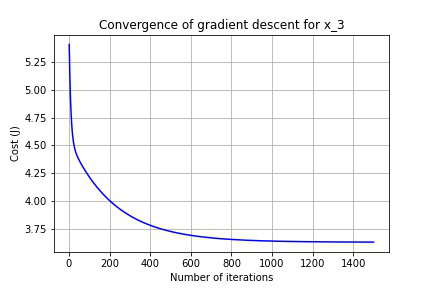

In [20]:
Image.open('convergence2.jpg')

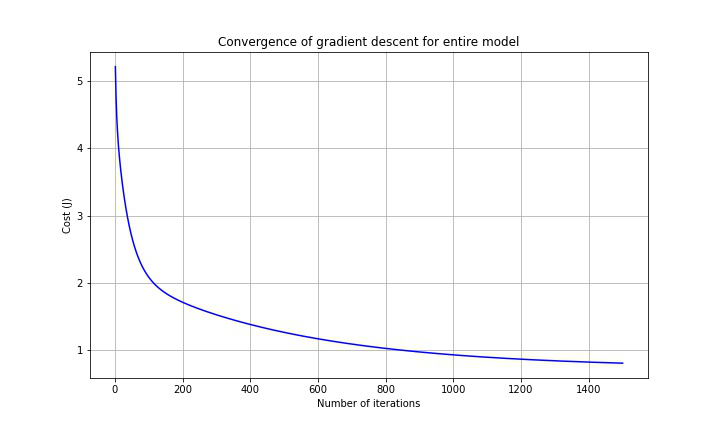

In [21]:
Image.open('convergence_part2.jpg')